# Exploraaaaaaaaaaation #

In [1]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
#datapath = 'data/'

## Loading Recipes ##

In [3]:
#filename = 'RAW_recipes.csv'

In [4]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [5]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [6]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [7]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [8]:
#filename = 'RAW_interactions.csv'

In [9]:
#df_inter = pd.read_csv(datapath + filename)

In [10]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [11]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [12]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [13]:
#df_inter_recipe

In [14]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [15]:
#df

In [16]:
#df.describe()

In [17]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [18]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [19]:
df = pd.read_json('data/recipes.json')

In [20]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [21]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

In [22]:
# We don't want oven or dessert recipes
index = df.tags.to_numpy()
f = lambda x: ('desserts' not in x and 'oven' not in x)
index = [f(x) for x in index]
df = df[index]

## Tag Analysis ##

In [23]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'])],
      dtype=object)

In [24]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
44061     [weeknight, time-to-make, course, main-ingredi...
5289      [15-minutes-or-less, time-to-make, course, mai...
25274     [15-minutes-or-less, time-to-make, course, mai...
                                ...                        
357451    [15-minutes-or-less, time-to-make, course, cui...
188810    [60-minutes-or-less, time-to-make, course, mai...
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, Length: 156948, dtype: object

In [25]:
tags = [j for i in df.tags for j in i]

In [26]:
tags_dict = Counter(tags)

In [27]:
tags_dict.most_common(50)

[('preparation', 156536),
 ('time-to-make', 155473),
 ('course', 145054),
 ('main-ingredient', 118171),
 ('dietary', 110524),
 ('easy', 89755),
 ('occasion', 71146),
 ('cuisine', 64027),
 ('low-in-something', 60895),
 ('main-dish', 54364),
 ('60-minutes-or-less', 45526),
 ('vegetables', 43101),
 ('30-minutes-or-less', 42586),
 ('meat', 41465),
 ('15-minutes-or-less', 36761),
 ('3-steps-or-less', 36736),
 ('number-of-servings', 36234),
 ('low-carb', 34551),
 ('north-american', 31020),
 ('taste-mood', 30586),
 ('4-hours-or-less', 29923),
 ('low-calorie', 29889),
 ('healthy', 29765),
 ('equipment', 29578),
 ('low-cholesterol', 29333),
 ('low-sodium', 28768),
 ('vegetarian', 26143),
 ('low-saturated-fat', 25303),
 ('5-ingredients-or-less', 24590),
 ('beginner-cook', 24435),
 ('dinner-party', 23657),
 ('inexpensive', 22752),
 ('low-protein', 22502),
 ('side-dishes', 21891),
 ('healthy-2', 21617),
 ('pasta-rice-and-grains', 21076),
 ('for-1-or-2', 20102),
 ('american', 19290),
 ('poultry', 1

In [28]:
tags_dict.get('north-american')  # Biased towards low quality food

31020

In [29]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [30]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [31]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [32]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [33]:
df_tag = df_tag.drop(columns='tags')

In [34]:
df_tag

,submitted,n_votes,avg_rating,std_rating,vegetarian,healthy,italian,beginner-cook,inexpensive,european
137739,2005-09-16,3,5.0,0.0,1,0,0,0,0,0
112140,2005-02-25,1,4.0,0.0,0,0,0,0,0,0
44061,2002-10-25,1,5.0,0.0,1,0,0,0,0,0
5289,1999-12-06,2,5.0,0.0,0,0,0,0,0,0
25274,2002-04-14,1,2.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
357451,2009-02-23,2,5.0,0.0,0,0,0,1,1,0
188810,2006-10-03,1,3.0,0.0,0,1,0,0,0,0
486161,2012-08-29,6,5.0,0.0,0,0,0,0,0,0
493372,2013-01-09,1,5.0,0.0,1,0,0,0,0,0


In [35]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [36]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [37]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [38]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [39]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [40]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


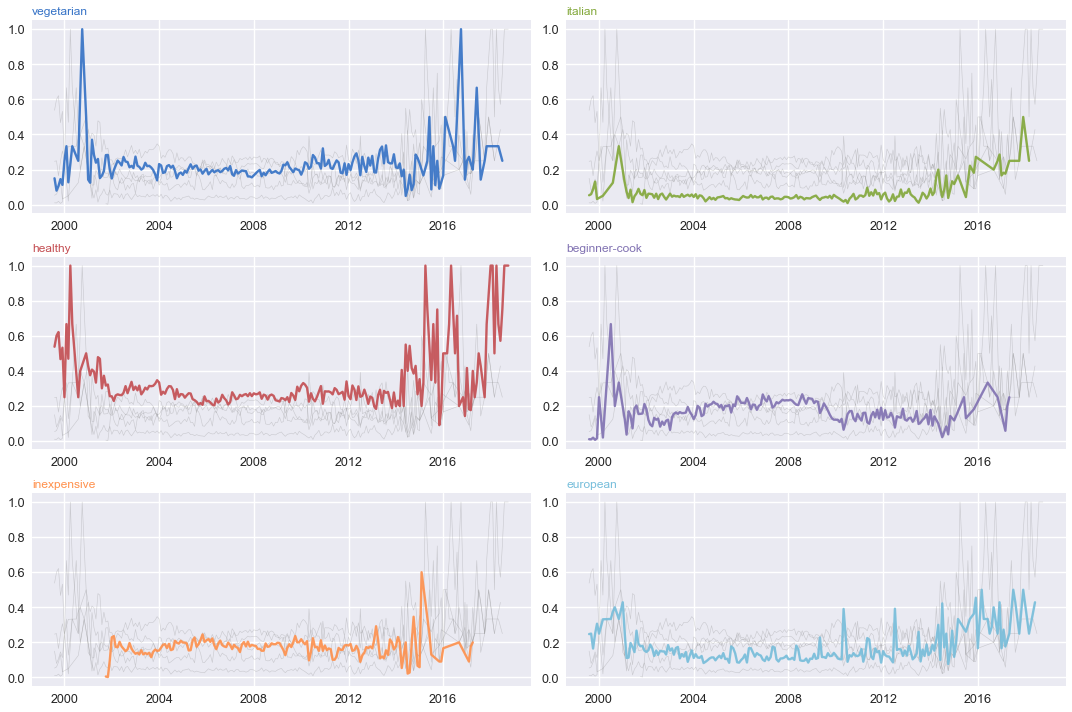

In [41]:
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
#fig.savefig('imgs/tags.png')
plt.show()


### Tags Yearly ###

In [42]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [43]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [44]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [45]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [46]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [47]:
data2

{'vegetarian': 1999-01-01      60
 2000-01-01      32
 2001-01-01     470
 2002-01-01    2122
 2003-01-01    1638
 2004-01-01    1492
 2005-01-01    2934
 2006-01-01    3401
 2007-01-01    3739
 2008-01-01    3338
 2009-01-01    2857
 2010-01-01    1615
 2011-01-01    1050
 2012-01-01     679
 2013-01-01     579
 2014-01-01      98
 2015-01-01      14
 2016-01-01       7
 2017-01-01      16
 2018-01-01       2
 Name: submitted, dtype: int64,
 'italian': 1999-01-01     40
 2000-01-01     12
 2001-01-01    136
 2002-01-01    476
 2003-01-01    396
 2004-01-01    297
 2005-01-01    529
 2006-01-01    772
 2007-01-01    785
 2008-01-01    728
 2009-01-01    591
 2010-01-01    228
 2011-01-01    313
 2012-01-01    134
 2013-01-01     99
 2014-01-01     44
 2015-01-01     11
 2016-01-01      4
 2017-01-01     10
 2018-01-01      1
 Name: submitted, dtype: int64,
 'healthy': 1999-01-01     271
 2000-01-01     103
 2001-01-01     675
 2002-01-01    2580
 2003-01-01    2330
 2004-01-01    2119


In [48]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

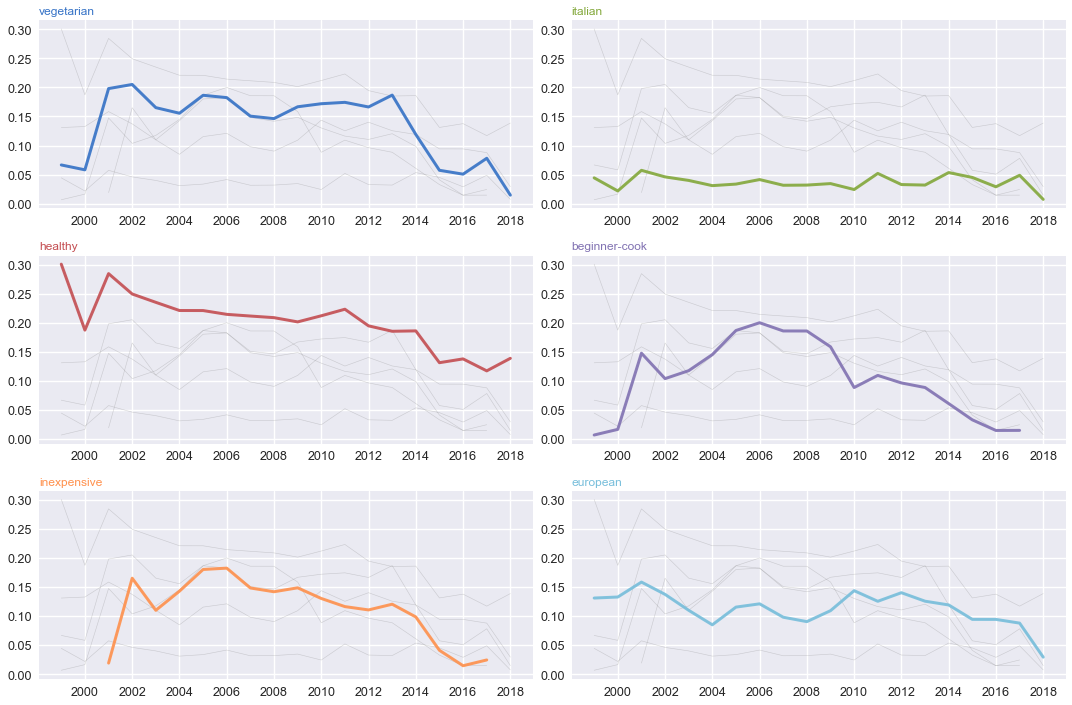

In [72]:
plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))


fig.tight_layout()
fig.savefig('imgs/tags_yearly.png')
plt.show()


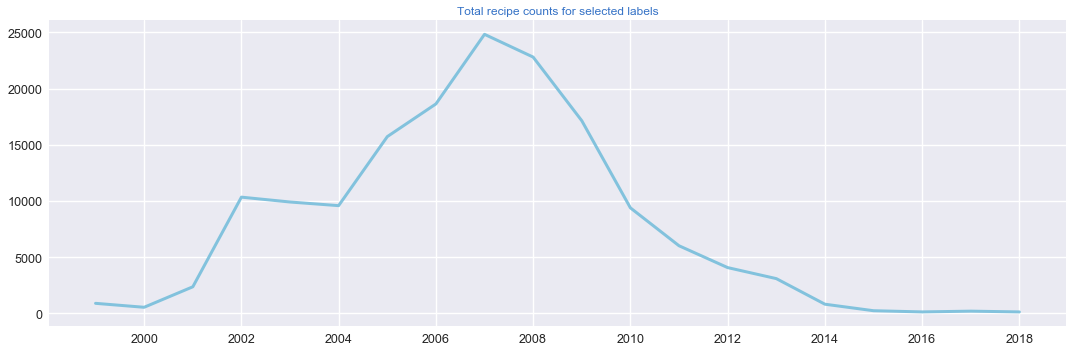

In [50]:
# Plotting yearly total

plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9)
ax.set_title('Total recipe counts for selected labels', fontsize=12, fontweight=0, color='C0')

fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [51]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_ing = df.loc[index]
df_ing

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating
54272,fool the meat eaters chili,40,40525,2003-02-17,"[60-minutes-or-less, time-to-make, course, mai...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"[rehydrate tvp if needed, spray or oil a large...",this recipe was adapted by my mother and mysel...,"[vegetarian ground beef, garlic, onion, jalape...",12,4,4.500000,1.000000
95926,say what banana sandwich,5,118163,2004-07-20,"[15-minutes-or-less, time-to-make, course, mai...","[238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]",4,[spread a tablespoon on one side of each slice...,you just have to try it to believe it.,"[white bread, mayonnaise, bananas]",3,43,4.139535,1.740025
112959,sour cream avocado dip vegan,10,167849,2005-03-08,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",7,4,3.750000,2.500000
63793,tide me over indian chaat simple veggie salad,2,12657,2003-06-05,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",7,7,4.428571,0.786796
70099,1 asian noodle salad,26,75379,2003-09-02,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]",7,"[bring a large pot of water to boil, add rice ...",i am addicted to this! and it's so easy to mak...,"[rice noodles, carrot, english cucumber, green...",13,5,4.200000,0.836660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202637,zucchini feta mash,15,40114,2006-12-30,"[15-minutes-or-less, time-to-make, course, mai...","[190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]",8,"[juice the lemon, grate the zucchini coarsely,...",a nice and healthy alternative for mashed pota...,"[lemon, zucchini, olive oil, salt, pepper, fet...",7,1,2.000000,0.000000
66897,zucchini onion salad,18,92725,2003-07-16,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]",10,"[grate zucchini, dice onion, over medium heat ...","i wrinkled my nose at this in the beginning, t...","[onion, sour cream, butter, fresh ground peppe...",7,3,4.000000,1.732051
96811,zucotte,65,65056,2004-08-03,"[time-to-make, course, main-ingredient, prepar...","[145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]",10,"[in a large , heavy saucpan , melt 1 tbs of th...",a garlicky braised winter squash dish that cou...,"[butter, white wine, garlic, butternut squash,...",6,12,4.916667,0.288675
89330,zuppa sarda sardinian cheese and egg soup wit...,30,94272,2004-04-18,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"[preheat oven to 350 degrees f, brush bread sl...","so easy, this cheesy italian comfort food is d...","[french bread, olive oil, garlic, low sodium v...",9,1,5.000000,0.000000


In [52]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [53]:
ingredients_dict = Counter(ingredients)

In [54]:
ingredients_dict.most_common(50)

[('salt', 2386),
 ('olive oil', 1513),
 ('water', 1152),
 ('onion', 1134),
 ('garlic cloves', 964),
 ('butter', 834),
 ('sugar', 786),
 ('tomatoes', 561),
 ('pepper', 558),
 ('salt and pepper', 547),
 ('garlic', 494),
 ('eggs', 457),
 ('garlic clove', 435),
 ('black pepper', 428),
 ('lemon juice', 421),
 ('parmesan cheese', 393),
 ('vegetable oil', 391),
 ('milk', 372),
 ('extra virgin olive oil', 331),
 ('oil', 329),
 ('ground cumin', 323),
 ('carrots', 305),
 ('flour', 303),
 ('carrot', 298),
 ('garlic powder', 298),
 ('onions', 284),
 ('potatoes', 272),
 ('fresh parsley', 272),
 ('chili powder', 269),
 ('zucchini', 260),
 ('red onion', 259),
 ('honey', 255),
 ('cumin', 253),
 ('celery', 246),
 ('cinnamon', 235),
 ('brown sugar', 234),
 ('egg', 233),
 ('fresh ground black pepper', 221),
 ('baking powder', 212),
 ('fresh cilantro', 211),
 ('cayenne pepper', 210),
 ('parsley', 210),
 ('black beans', 209),
 ('soy sauce', 205),
 ('paprika', 203),
 ('chickpeas', 194),
 ('sour cream', 188)

In [55]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [56]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [57]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [58]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [59]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

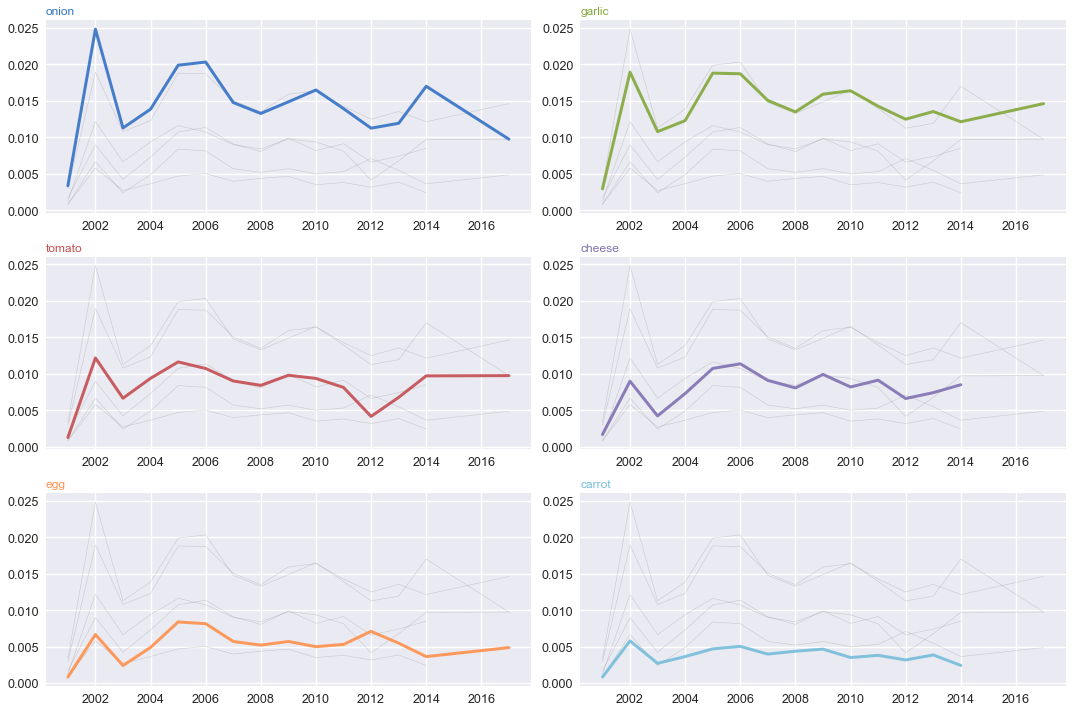

In [60]:
plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
fig.savefig('imgs/ing_yearly.png')
plt.show()


In [138]:
for i in df_ing.ingredients:
    print(i)
df_ing

['vegetarian ground beef', 'garlic', 'onion', 'jalapenos', 'green pepper', 'celery', 'kidney beans', 'diced tomatoes', 'chili powder', 'black pepper', 'salt', 'red pepper flakes']
['white bread', 'mayonnaise', 'bananas']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['rice noodles', 'carrot', 'english cucumber', 'green onions', 'bean sprouts', 'garlic', 'fresh ginger', 'light soy sauce', 'sesame oil', 'rice wine vinegar', 'honey', 'asian chili sauce', 'fresh cilantro']
['spaghetti squash', 'asparagus', 'white mushroom', 'red bell pepper', 'garlic cloves', 'spaghetti sauce', 'italian seasoning', 'part-skim mozzarella cheese', 'reduced-fat parmesan cheese', 'salt and pepper']
['water', 'white rice', 'tea bag', 'seasoning salt', 'black pepper', 'dried basil', 'chili powder', 'garlic powder', 'cayenne pepper', 'soy sauce', 'lemon juice

['olive oil', 'onion', 'curry powder', 'cayenne pepper', 'vegetable broth', 'swiss chard', 'dried red lentils', 'chickpeas', 'salt', 'greek yogurt', 'jalapeno pepper', 'lime']
['red lentil', 'onion', 'vegetable oil', 'curry paste', 'ground turmeric', 'ground cumin', 'chili powder', 'salt', 'sugar', 'garlic', 'fresh ginger', 'tomato puree']
['onion', 'olive oil', 'garlic cloves', 'ginger', 'turmeric', 'curry powder', 'brown rice', 'red lentil', 'vegetable stock base', 'water', 'salt', 'dark raisin', 'granny smith apples']
['cooked brown rice', 'red kidney beans', 'green onions', 'green bell pepper', 'celery ribs', 'fresh parsley', 'plain nonfat yogurt', 'curry powder', 'black pepper', 'salt']
['popcorn', 'vegetable oil', 'butter', 'ground turmeric', 'mild curry powder', 'salt']
['olive oil', 'onion', 'salt', 'pepper', 'garlic', 'split peas', 'vegetable broth', 'curry powder']
['butternut squash', 'onions', 'fresh ginger', 'garlic', 'butter', 'basmati rice', 'curry powder', 'salt', 'de-f

['whole wheat flour', 'eggs', 'milk', 'cinnamon', 'fruit jam', 'real maple syrup']
['onions', 'celery ribs', 'olive oil flavored cooking spray', 'brown lentils', 'vegetable broth', 'water', 'tomatoes', 'salt and pepper', 'cheddar cheese']
['navy beans', 'water', 'carrots', 'balsamic vinegar', 'onions', 'garlic cloves', 'celery leaves', 'cabbage', 'bay leaves', 'tomato sauce', 'ground ginger', 'mustard powder', 'chili powder', 'black pepper', 'thyme', 'parsley flakes', 'salt', 'tabasco sauce']
['olive oil', 'onion', 'carrots', 'celery', 'cabbage', 'bay leaf', 'garlic cloves', 'steak seasoning', 'chicken stock', 'diced tomatoes', 'cannellini beans', 'corn', 'zucchini', 'salt and pepper', 'green beans']
['onion', 'green pepper', 'garlic cloves', 'olive oil', 'extra firm tofu', 'cumin', 'hot sauce', 'salt', 'pepper', 'red kidney beans', 'white kidney beans', 'diced tomatoes', 'tomato sauce', 'carrots', 'chili powder']
['warm water', 'active dry yeast', 'molasses', 'vital wheat gluten', 'st

['fresh garlic cloves', 'ground cumin', 'salt', 'cracked black pepper', 'lemon juice', 'olive oil']
['potatoes', 'fresh garlic cloves', 'ground cumin', 'salt', 'cracked black pepper', 'lemon juice', 'olive oil']
['mashed potatoes', 'garlic cloves', 'scallion', 'flat leaf parsley', 'salt', 'fresh ground black pepper', 'flour', 'oil']
['apples', 'green peppers', 'tomatoes', 'cucumbers', 'extra virgin olive oil', 'lemon juice', 'salt', 'pepper']
['olive oil', 'onion', 'garlic cloves', 'ground coriander', 'ground cumin', 'chili powder', 'sweet potatoes', 'carrots', 'chicken stock', 'chickpeas', 'lemon, juice of']
['vegetable oil', 'onion', 'carrot', 'garlic clove', 'cinnamon', 'ground coriander', 'ground cumin', 'salt', 'pepper', 'cayenne pepper', 'yellow sweet pepper', 'zucchini', 'cauliflower florets', 'canned chick-peas', 'pasta sauce', 'lemon juice', 'frozen peas', 'fresh coriander', 'almond butter', 'butter', 'turmeric', 'all-purpose flour', 'milk']
['olive oil', 'onion', 'garlic', 'c

['pumpkin', 'whole cloves', 'water', 'cider vinegar', 'brown sugar', 'white sugar', 'cinnamon sticks', 'allspice']
['olive oil', 'chili powder', 'ground cumin', 'paprika', 'ground coriander', 'black pepper', 'chickpeas']
['splenda granular', 'fresh gingerroot', 'allspice berries', 'cloves', 'black tea bags', 'lemon juice', 'oranges']
['baked beans', 'onion', 'garlic', 'chili powder', 'curry powder', 'cumin', 'steak sauce']
['yams', 'coconut milk', 'cooking oil', 'brown sugar', 'ginger', 'garlic clove', 'curry paste']
['fresh corn', 'chicken broth', 'grapeseed oil', 'yellow onion', 'serrano chili', 'fresh lime juice', 'fresh basil', 'salt', 'ground black pepper']
['rice', 'creamed corn', 'black beans', 'hot sauce', 'cheese']
['vegetable oil', 'onion', 'sweet potato', 'garlic cloves', 'vegetable broth', 'long grain rice', 'ground thyme', 'ground cumin', 'salsa', 'garbanzo beans', 'zucchini', 'crunchy peanut butter', 'peanuts']
['light olive oil', 'diced onions', 'flour', 'milk', 'nutmeg'

['zucchini', 'garlic cloves', 'white beans', 'extra virgin olive oil', 'lemon, juice of', 'parmesan cheese', 'fresh basil', 'multi-grain penne', 'black pepper', 'kosher salt']
['cannellini beans', 'garlic cloves', 'fresh rosemary', 'salt', 'fresh ground pepper', 'olive oil', 'lemon juice', 'cayenne', 'spinach']
['olive oil', 'onion', 'garlic cloves', 'cannellini beans', 'vegetable stock', 'flat leaf parsley', 'salt and pepper']
['white beans', 'almond butter', 'honey', 'cinnamon']
['kale', 'extra virgin olive oil', 'onion', 'garlic cloves', 'dry white bean', 'bay leaf', 'salt', 'rice', 'chicken broth', 'fresh ground pepper', 'fresh lemon juice', 'parmesan cheese']
['fresh rosemary', 'olive oil', 'garlic cloves', 'white beans', 'white onion', 'romano cheese', 'kosher salt', 'fresh ground pepper', 'lemon', 'fresh parsley']
['asadero cheese', 'fresh jalapenos', 'half-and-half cream', 'onion', 'ground cumin', 'salt', 'tortilla chips']
['white cake mix', 'water', 'unbleached flour', 'orange

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,n_votes,avg_rating,std_rating,onion,garlic,tomato,cheese,egg,carrot,dlen
54272,fool the meat eaters chili,40,40525,2003-01-01,"[60-minutes-or-less, time-to-make, course, mai...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"[rehydrate tvp if needed, spray or oil a large...",this recipe was adapted by my mother and mysel...,"[vegetarian ground beef, garlic, onion, jalape...",...,4,4.500000,1.000000,1,1,1,0,0,0,343
95926,say what banana sandwich,5,118163,2004-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]",4,[spread a tablespoon on one side of each slice...,you just have to try it to believe it.,"[white bread, mayonnaise, bananas]",...,43,4.139535,1.740025,0,0,0,0,0,0,38
112959,sour cream avocado dip vegan,10,167849,2005-01-01,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",...,4,3.750000,2.500000,0,0,0,0,0,0,228
63793,tide me over indian chaat simple veggie salad,2,12657,2003-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",...,7,4.428571,0.786796,0,0,1,0,0,0,76
70099,1 asian noodle salad,26,75379,2003-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]",7,"[bring a large pot of water to boil, add rice ...",i am addicted to this! and it's so easy to mak...,"[rice noodles, carrot, english cucumber, green...",...,5,4.200000,0.836660,1,1,0,0,0,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202637,zucchini feta mash,15,40114,2006-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]",8,"[juice the lemon, grate the zucchini coarsely,...",a nice and healthy alternative for mashed pota...,"[lemon, zucchini, olive oil, salt, pepper, fet...",...,1,2.000000,0.000000,0,0,0,1,0,0,129
66897,zucchini onion salad,18,92725,2003-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]",10,"[grate zucchini, dice onion, over medium heat ...","i wrinkled my nose at this in the beginning, t...","[onion, sour cream, butter, fresh ground peppe...",...,3,4.000000,1.732051,1,0,0,0,0,0,276
96811,zucotte,65,65056,2004-01-01,"[time-to-make, course, main-ingredient, prepar...","[145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]",10,"[in a large , heavy saucpan , melt 1 tbs of th...",a garlicky braised winter squash dish that cou...,"[butter, white wine, garlic, butternut squash,...",...,12,4.916667,0.288675,0,1,0,0,0,0,209
89330,zuppa sarda sardinian cheese and egg soup wit...,30,94272,2004-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"[preheat oven to 350 degrees f, brush bread sl...","so easy, this cheesy italian comfort food is d...","[french bread, olive oil, garlic, low sodium v...",...,1,5.000000,0.000000,0,1,0,1,1,0,347


# Ingredients controversy

In [98]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [115]:
df.shape

(156948, 14)

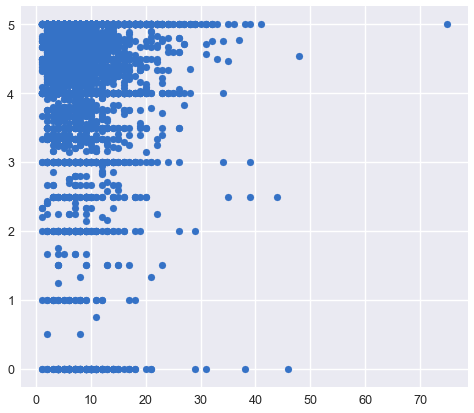

In [101]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [144]:
print(df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print(df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())

8.0
184.0


In [142]:
dlen = []
for i in df['description']:
    if type(i) == type(''):
        dlen.append(len(i))
    else:
        dlen.append(0)
df['dlen'] = dlen

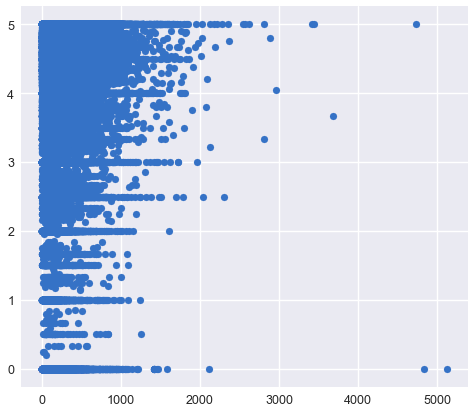

In [143]:
plt.scatter(df['dlen'], df['avg_rating'])

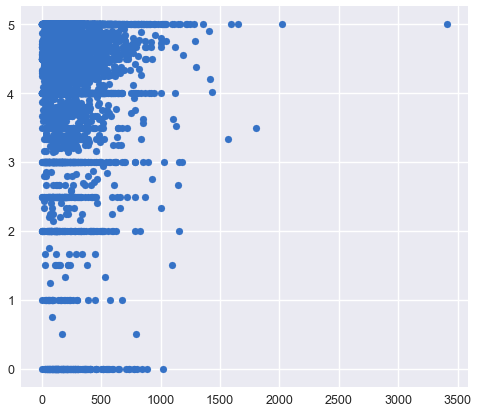

In [113]:
plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Title bullshit

In [171]:
from nltk.tokenize import sent_tokenize, word_tokenize 

text = word_tokenize(df_ing['name'].str.cat(sep=' '))

In [176]:
lo = Counter(text)
irr = ['s', 'with', 'and']
lo = {k:v for k,v in lo.items() if k not in irr}

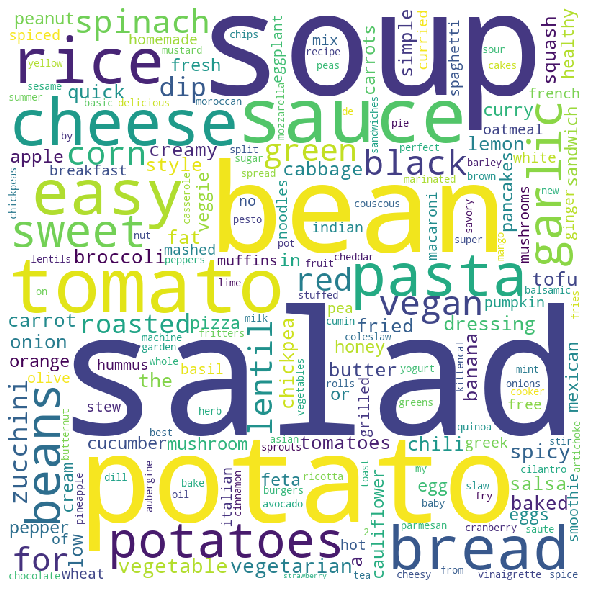

In [177]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# BULLSHIT

In [61]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [62]:
tags = [j for i in df_interesting.tags for j in i]

In [63]:
tags_dict = Counter(tags)

In [64]:
tags_dict.most_common(50)

[('preparation', 6157),
 ('vegetarian', 6157),
 ('dietary', 6157),
 ('inexpensive', 6157),
 ('time-to-make', 6133),
 ('course', 6037),
 ('main-ingredient', 5477),
 ('easy', 5112),
 ('occasion', 4474),
 ('cuisine', 3805),
 ('vegetables', 3347),
 ('low-in-something', 2988),
 ('beginner-cook', 2647),
 ('taste-mood', 2351),
 ('low-cholesterol', 2208),
 ('15-minutes-or-less', 1957),
 ('healthy', 1951),
 ('vegan', 1948),
 ('low-calorie', 1830),
 ('side-dishes', 1826),
 ('low-saturated-fat', 1815),
 ('north-american', 1795),
 ('30-minutes-or-less', 1771),
 ('number-of-servings', 1761),
 ('equipment', 1752),
 ('healthy-2', 1706),
 ('low-sodium', 1699),
 ('low-protein', 1661),
 ('main-dish', 1555),
 ('60-minutes-or-less', 1548),
 ('3-steps-or-less', 1505),
 ('dinner-party', 1448),
 ('pasta-rice-and-grains', 1367),
 ('kid-friendly', 1329),
 ('presentation', 1293),
 ('5-ingredients-or-less', 1262),
 ('comfort-food', 1244),
 ('low-fat', 1220),
 ('lunch', 1181),
 ('low-carb', 1180),
 ('american', 1

In [65]:
df_interesting

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating
54272,fool the meat eaters chili,40,40525,2003-02-17,"[60-minutes-or-less, time-to-make, course, mai...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"[rehydrate tvp if needed, spray or oil a large...",this recipe was adapted by my mother and mysel...,"[vegetarian ground beef, garlic, onion, jalape...",12,4,4.500000,1.000000
95926,say what banana sandwich,5,118163,2004-07-20,"[15-minutes-or-less, time-to-make, course, mai...","[238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]",4,[spread a tablespoon on one side of each slice...,you just have to try it to believe it.,"[white bread, mayonnaise, bananas]",3,43,4.139535,1.740025
112959,sour cream avocado dip vegan,10,167849,2005-03-08,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",7,4,3.750000,2.500000
63793,tide me over indian chaat simple veggie salad,2,12657,2003-06-05,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",7,7,4.428571,0.786796
70099,1 asian noodle salad,26,75379,2003-09-02,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]",7,"[bring a large pot of water to boil, add rice ...",i am addicted to this! and it's so easy to mak...,"[rice noodles, carrot, english cucumber, green...",13,5,4.200000,0.836660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202637,zucchini feta mash,15,40114,2006-12-30,"[15-minutes-or-less, time-to-make, course, mai...","[190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]",8,"[juice the lemon, grate the zucchini coarsely,...",a nice and healthy alternative for mashed pota...,"[lemon, zucchini, olive oil, salt, pepper, fet...",7,1,2.000000,0.000000
66897,zucchini onion salad,18,92725,2003-07-16,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]",10,"[grate zucchini, dice onion, over medium heat ...","i wrinkled my nose at this in the beginning, t...","[onion, sour cream, butter, fresh ground peppe...",7,3,4.000000,1.732051
96811,zucotte,65,65056,2004-08-03,"[time-to-make, course, main-ingredient, prepar...","[145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]",10,"[in a large , heavy saucpan , melt 1 tbs of th...",a garlicky braised winter squash dish that cou...,"[butter, white wine, garlic, butternut squash,...",6,12,4.916667,0.288675
89330,zuppa sarda sardinian cheese and egg soup wit...,30,94272,2004-04-18,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"[preheat oven to 350 degrees f, brush bread sl...","so easy, this cheesy italian comfort food is d...","[french bread, olive oil, garlic, low sodium v...",9,1,5.000000,0.000000


In [66]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

0.024842919284678588

In [67]:
total_dict

{Timestamp('1999-01-01 00:00:00'): 901,
 Timestamp('2000-01-01 00:00:00'): 550,
 Timestamp('2001-01-01 00:00:00'): 2373,
 Timestamp('2002-01-01 00:00:00'): 10345,
 Timestamp('2003-01-01 00:00:00'): 9913,
 Timestamp('2004-01-01 00:00:00'): 9589,
 Timestamp('2005-01-01 00:00:00'): 15731,
 Timestamp('2006-01-01 00:00:00'): 18637,
 Timestamp('2007-01-01 00:00:00'): 24827,
 Timestamp('2008-01-01 00:00:00'): 22805,
 Timestamp('2009-01-01 00:00:00'): 17137,
 Timestamp('2010-01-01 00:00:00'): 9391,
 Timestamp('2011-01-01 00:00:00'): 6022,
 Timestamp('2012-01-01 00:00:00'): 4081,
 Timestamp('2013-01-01 00:00:00'): 3099,
 Timestamp('2014-01-01 00:00:00'): 823,
 Timestamp('2015-01-01 00:00:00'): 244,
 Timestamp('2016-01-01 00:00:00'): 138,
 Timestamp('2017-01-01 00:00:00'): 205,
 Timestamp('2018-01-01 00:00:00'): 137}

In [68]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]

137